In [82]:
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
from scipy import sparse
import os
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [83]:
##Create meshgrid for x y z
N = 100
L = 8
k=4
X,Y,Z= np.meshgrid(np.linspace(-L/2,L/2,N,
dtype=float),
np.linspace(-L/2,L/2,N, dtype=float),
np.linspace(-L/2,L/2,N, dtype=float))

In [84]:
V = np.zeros([N, N, N])

In [85]:
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1, 0,1]),N, N)
I = np.identity(N)

In [86]:
D1 = sparse.kronsum(D,D)
D2 = sparse.kronsum(D1,D)
T=(-1/2)*D2
U = sparse.diags(V.reshape(N**3),(0))
H = T+U

In [87]:
##Solve for eigenvector and eigenvalue
eigenvalues , eigenvectors = eigsh(H, k=k, which='SM')
def get_e(n):
    return eigenvectors.T[n].reshape((N,N,N))

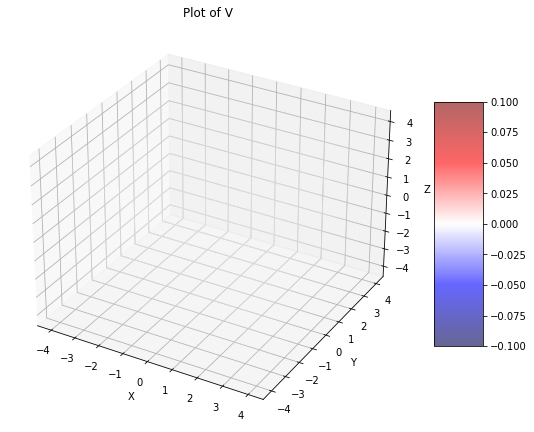

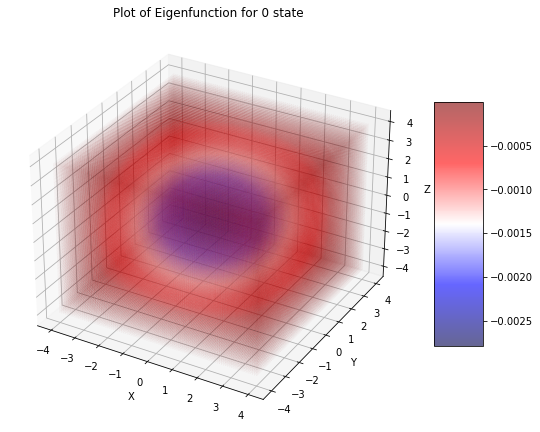

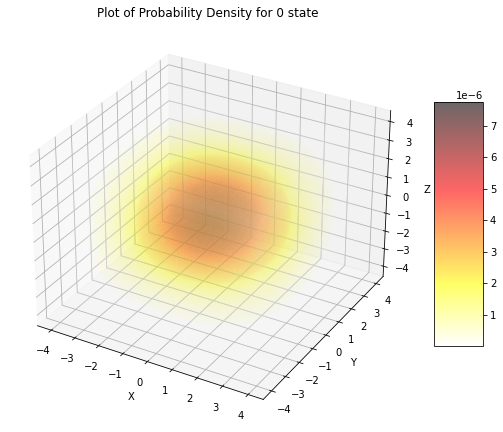

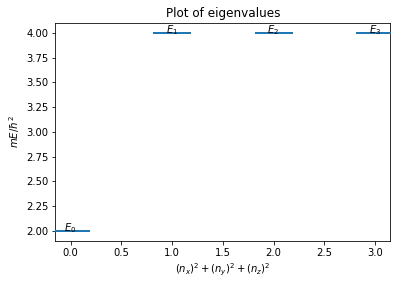

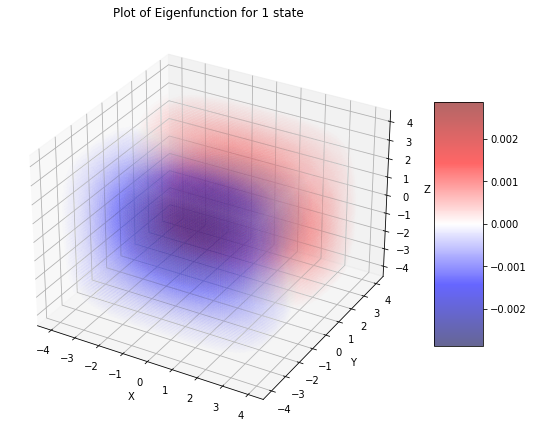

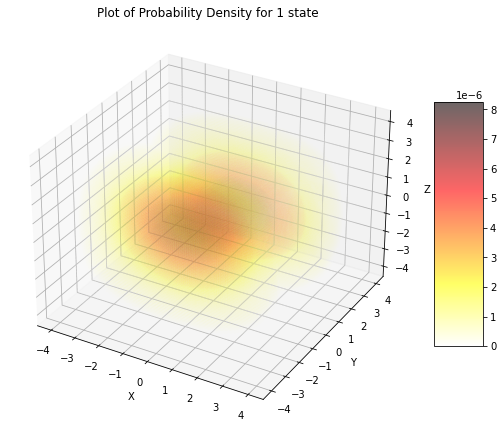

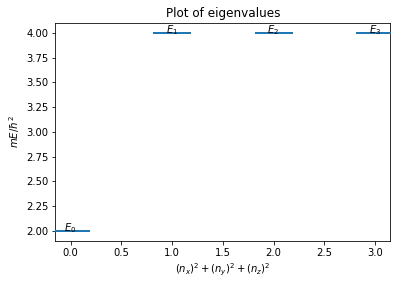

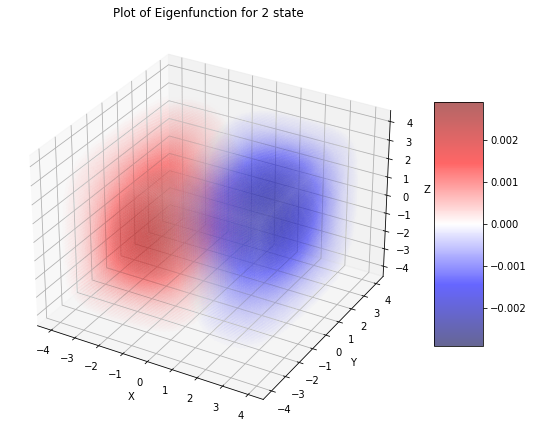

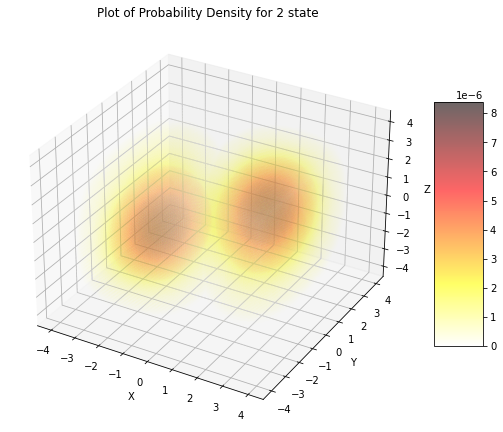

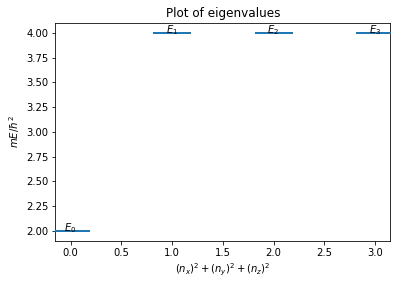

In [88]:
##plot V
fig = plt.figure(0,figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
plot0 = ax.scatter3D(X, Y, Z, c=V,
cmap=cm.seismic,
s=0.001,
alpha=0.6,
antialiased=True)
fig.colorbar(plot0, shrink=0.5, aspect=5)
ax.set_xlabel(r'X')
ax.set_ylabel(r'Y')
ax.set_zlabel(r'Z')
ax.set_title("Plot of V")
plt.show()

##number of state
for n in range (0,k-1):
    ##plot eigenvector
    fig = plt.figure(1,figsize=(9,9))
    ax = fig.add_subplot(111, projection='3d')
    #ax.set_axis_off()
    plot1 = ax.scatter3D(X, Y, Z, c=get_e(n),
    cmap=cm.seismic,
    s=0.001,
    alpha=0.6,
    antialiased=True)
    fig.colorbar(plot1, shrink=0.5, aspect=5)
    ax.set_xlabel(r'X')
    ax.set_ylabel(r'Y')
    ax.set_zlabel(r'Z')
    ax.set_title("Plot of Eigenfunction for {} state".format(n))
    ##plot probability density
    fig = plt.figure(2,figsize=(9,9))
    ax = fig.add_subplot(111, projection='3d')
    #ax.set_axis_off()
    plot2 = ax.scatter3D(X, Y, Z, c=get_e(n)**2,
    cmap=cm.hot_r,
    s=0.001,
    alpha=0.6,
    antialiased=True)
    fig.colorbar(plot2, shrink=0.5, aspect=5)
    ax.set_xlabel(r'X')
    ax.set_ylabel(r'Y')
    ax.set_zlabel(r'Z')
    ax.set_title("Plot of Probability Density for {} state".format(n))
    ##plot eigenvalues
    plot3 = plt.figure(3)
    alpha = eigenvalues[0]/2
    E_a = eigenvalues/alpha
    b = np.arange(0, len(eigenvalues),1)
    plt.scatter(b, E_a, s=1444, marker="_",
    linewidth=2, zorder=3)
    plt.title("Plot of eigenvalues")
    plt.xlabel('$(n_{x})^2+(n_{y})^2+(n_{z})^2$')
    plt.ylabel(r'$mE/\hbar^2$')
    c = ['$E_{}$'.format(i) for i in range(0,len(eigenvalues))]
    for i, txt in enumerate(c):
        plt.annotate(txt, (np.arange(0,len(eigenvalues),1)[i], E_a[i]), ha="center")
    plt.show()
